### Question 7:
At first we import required libraries.

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import mixture
from matplotlib.patches import Ellipse
import os
#!pip install opencv-python
import cv2

The first step is to load images from given folder and save the average R and B of pixels in a picture. We know that opencv library stores pixels in BGR format so we consider it while saving data.

In [49]:
def loadImages(folder):
    cRed = []
    cBlue = []
    mRed = []
    mBlue = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            average = img.mean(axis=0).mean(axis=0)
            if filename[0] == "c" or filename == "index":
                cRed.append(average[2])
                cBlue.append(average[0])
            else:
                mRed.append(average[2])
                mBlue.append(average[0])
    return cRed, cBlue, mRed, mBlue

In [50]:
cRed, cBlue, mRed, mBlue = loadImages("./Images")

The next step is to build feature vectors for each class.

In [51]:
Xm = []
for i in range(len(mRed)):
    Xm.append([mRed[i], mBlue[i]])
Xc = []
for i in range(len(cRed)):
    Xc.append([cRed[i], cBlue[i]])

Now we fit a GMM to each class and report its parameters.

In [52]:
GMMm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(Xm)
print("Means: ", GMMm.means_, "Covariances: ", GMMm.covariances_, "Weights: ", GMMm.weights_)

Means:  [[124.12827426  82.35166195]
 [ 84.61852366  53.5820702 ]] Covariances:  [[[533.8760412  245.78530888]
  [245.78530888 419.39329583]]

 [[425.24042315 156.89434521]
  [156.89434521 182.61847932]]] Weights:  [0.44526233 0.55473767]


In [53]:
GMMc = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(Xc)
print("Means: ", GMMc.means_, "Covariances: ", GMMc.covariances_, "Weights: ", GMMc.weights_)

Means:  [[ 75.87465414  79.28901642]
 [111.48823964 138.79977137]] Covariances:  [[[421.59670712 284.33139043]
  [284.33139043 451.45875283]]

 [[896.18385597 604.23914074]
  [604.23914074 567.00942709]]] Weights:  [0.81703778 0.18296222]


I defined a function to draw contours of GMM models by getting their means and covariances.

In [54]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

Now we use our function and draw the contours over data's scatterplot.

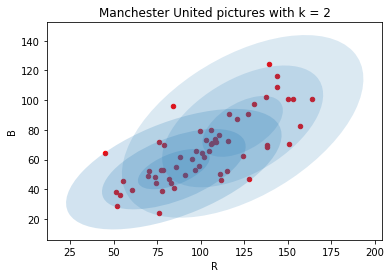

In [55]:
w_factor = 0.2 / GMMm.weights_.max()
for pos, covar, w in zip(GMMm.means_, GMMm.covariances_, GMMm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xm)[:, 0], np.array(Xm)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Manchester United pictures with k = 2")
plt.show()

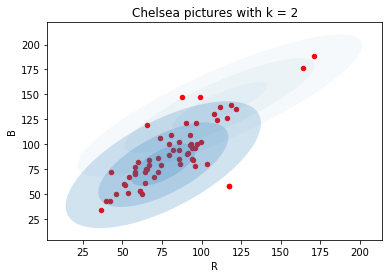

In [56]:
w_factor = 0.2 / GMMc.weights_.max()
for pos, covar, w in zip(GMMc.means_, GMMc.covariances_, GMMc.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xc)[:, 0], np.array(Xc)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Chelsea pictures with k = 2")
plt.show()

In this step i plotted the scatterplots and contours for different number of components. 4 is a little bit underfit and 24 is absoloutely overfitting data. The bes among these is 8 components for each GMM.

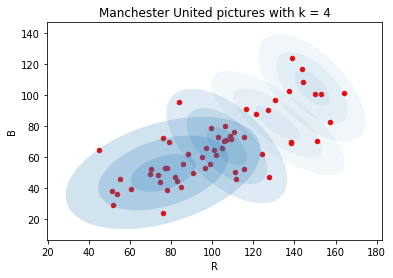

In [57]:
GMMm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(Xm)
w_factor = 0.2 / GMMm.weights_.max()
for pos, covar, w in zip(GMMm.means_, GMMm.covariances_, GMMm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xm)[:, 0], np.array(Xm)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Manchester United pictures with k = 4")
plt.show()

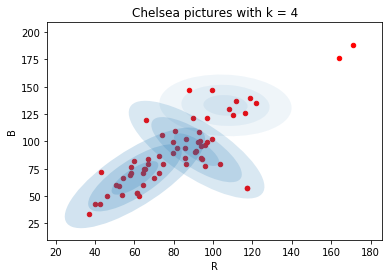

In [64]:
GMMc = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(Xc)
w_factor = 0.2 / GMMc.weights_.max()
for pos, covar, w in zip(GMMc.means_, GMMc.covariances_, GMMc.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xc)[:, 0], np.array(Xc)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Chelsea pictures with k = 4")
plt.show()

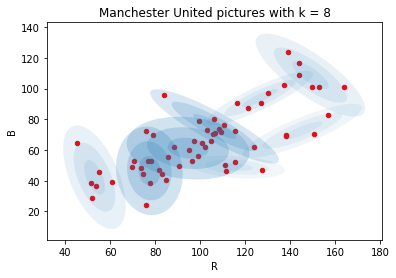

In [70]:
GMMm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(Xm)
w_factor = 0.2 / GMMm.weights_.max()
for pos, covar, w in zip(GMMm.means_, GMMm.covariances_, GMMm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xm)[:, 0], np.array(Xm)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Manchester United pictures with k = 8")
plt.show()

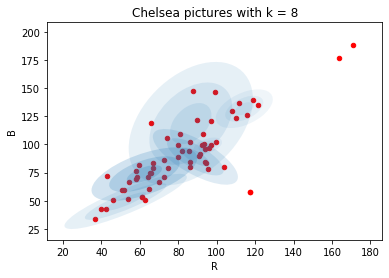

In [71]:
GMMc = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(Xc)
w_factor = 0.2 / GMMc.weights_.max()
for pos, covar, w in zip(GMMc.means_, GMMc.covariances_, GMMc.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xc)[:, 0], np.array(Xc)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Chelsea pictures with k = 8")
plt.show()

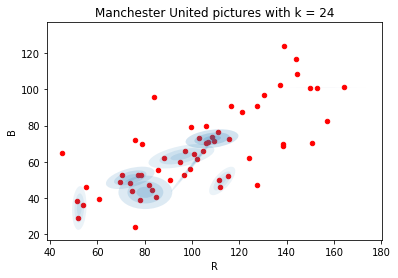

In [72]:
GMMm = mixture.GaussianMixture(n_components=24, covariance_type='full').fit(Xm)
w_factor = 0.2 / GMMm.weights_.max()
for pos, covar, w in zip(GMMm.means_, GMMm.covariances_, GMMm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xm)[:, 0], np.array(Xm)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Manchester United pictures with k = 24")
plt.show()

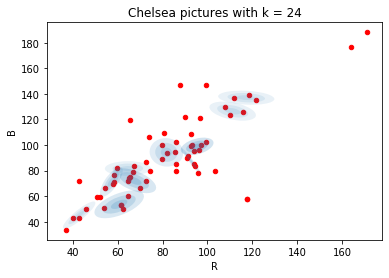

In [73]:
GMMc = mixture.GaussianMixture(n_components=24, covariance_type='full').fit(Xc)
w_factor = 0.2 / GMMc.weights_.max()
for pos, covar, w in zip(GMMc.means_, GMMc.covariances_, GMMc.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.scatter(np.array(Xc)[:, 0], np.array(Xc)[:, 1], c='red', s=20)
plt.xlabel("R")
plt.ylabel("B")
plt.title("Chelsea pictures with k = 24")
plt.show()

The last step is to plot AIC and BIC plots for each class regarding number of components for GMM. It is obvious that from a point these metrics decrease and does not penalize overfitting enough. We are aware that compared to the BIC method, the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models. It can be seeb in the plot that BIC is more reasonable but even BIC was not able to choose the best model and the better option was to use MDL criteria. With all these points said, the best number of components is 18 in my opinion because it is the least amongst the prevois numbers and the next nmber is also higher. After this point the plots are strictly descending.

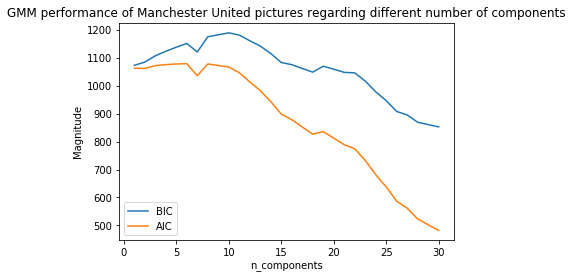

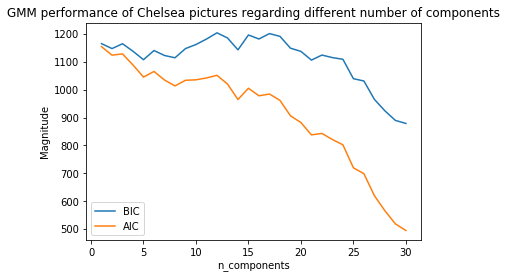

In [76]:
n_components = np.arange(1, 31)
modelsm = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xm) for n in n_components]
modelsc = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xc) for n in n_components]
plt.plot(n_components, [m.bic(np.array(Xm)) for m in modelsm], label='BIC')
plt.plot(n_components, [m.aic(np.array(Xm)) for m in modelsm], label='AIC')
plt.legend(loc='lower left')
plt.xlabel("n_components")
plt.ylabel("Magnitude")
plt.title("GMM performance of Manchester United pictures regarding different number of components")
plt.show()
plt.plot(n_components, [m.bic(np.array(Xc)) for m in modelsc], label='BIC')
plt.plot(n_components, [m.aic(np.array(Xc)) for m in modelsc], label='AIC')
plt.legend(loc='lower left')
plt.xlabel("n_components")
plt.ylabel("Magnitude")
plt.title("GMM performance of Chelsea pictures regarding different number of components")
plt.show()